In [1]:
import datajoint as dj
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
dj.conn().connect()

Please enter DataJoint username: thinh
Please enter DataJoint password: ········
Connecting thinh@mesoscale-activity.datajoint.io:3306


In [2]:
%matplotlib inline
import os
os.chdir('..')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, histology, psth
from pipeline.plot import unit_characteristic_plot

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Visualization of ephys analysis results 

This notebook demonstrates data visualization with the MAP pipeline, specifically focus on the queries and visualizations of the ephys analysis results, using the provided MAP built-in visualization functions

This notebook presents and demonstrates 9 built-in functions - part of the ***unit_characteristic_plot*** module:
+ plot_clustering_quality(***probe insertion***)
+ plot_unit_characteristic(***probe insertion***)

+ plot_unit_selectivity(***probe insertion***)
+ plot_unit_bilateral_photostim_effect(***probe insertion***)

+ plot_stacked_contra_ipsi_psth(***units***)
+ plot_avg_contra_ipsi_psth(***units***)
+ plot_psth_bilateral_photostim_effect(***units***)
+ plot_coding_direction(***units***) 
+ plot_paired_coding_direction(***units***)

See below for the ERD(s) of the relevant portions of the MAP pipeline for this notebook

In [4]:
unit_erd = ((dj.ERD(ephys.ProbeInsertion.InsertionLocation) - 1)
            + (dj.ERD(psth.UnitSelectivity))
            + (dj.ERD(psth.UnitPsth))
            + (dj.ERD(experiment.BrainLocation) - 1)
            + (dj.ERD(ephys.Unit) - 1)
            + (dj.ERD(ephys.UnitCoarseBrainLocation)))

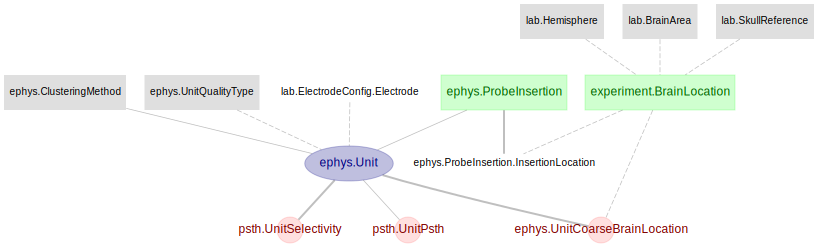

In [5]:
unit_erd

## Part 1: Unit quality from a clustering analysis

### The MAP pipeline provides 2 built-in functions for visualizing the clustering quality
+ unit_characteristic_plot.plot_clustering_quality(***probe insertion***)
+ unit_characteristic_plot.plot_unit_characteristic(***probe insertion***)

Note: since clustering is performed per ***probe insertion***, these functions take ***probe insertion*** as input. This input ***probe insertion*** can take the form of a queried expression of the ***ephys.ProbeInsertion*** table (see examples below).

#### Start by selecting a ***probe insertion***

##### Here, we can start by viewing all of the probe insertion with ***PSTH*** and ***Selectivity*** calculated.

In [4]:
ephys.ProbeInsertion & psth.UnitPsth & psth.UnitSelectivity

subject_id institution 6 digit animal ID,session session number,insertion_number,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name
412330,15,1,15131808323,npx_first384
412330,15,2,15131808323,npx_first384
412753,41,1,15131808323,npx_first384
412753,41,2,15131808323,npx_first384
413950,20,2,15131808323,npx_first384
413950,21,1,15131808323,npx_first384
413950,21,2,15131808323,npx_first384
432572,9,2,15131808323,npx_first384
432572,10,2,15131808323,npx_first384
432572,14,1,15131808323,npx_first384


##### Then, we can pick one by restricting to the ***subject***, ***session*** and ***insertion_number*** of interest

In [8]:
probe_insertion = (ephys.ProbeInsertion & {'session': 15, 'subject_id': 432572, 'insertion_number': 2})

##### Inspecting the *selectivity* of all the units in the selected probe insertion

In [9]:
psth.UnitSelectivity & probe_insertion

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_selectivity
432572,15,2,jrclust,1,contra-selective
432572,15,2,jrclust,10,ipsi-selective
432572,15,2,jrclust,12,contra-selective
432572,15,2,jrclust,14,contra-selective
432572,15,2,jrclust,16,ipsi-selective
432572,15,2,jrclust,17,ipsi-selective
432572,15,2,jrclust,23,ipsi-selective
432572,15,2,jrclust,26,ipsi-selective
432572,15,2,jrclust,27,ipsi-selective
432572,15,2,jrclust,28,contra-selective


#### Plot Clustering Quality

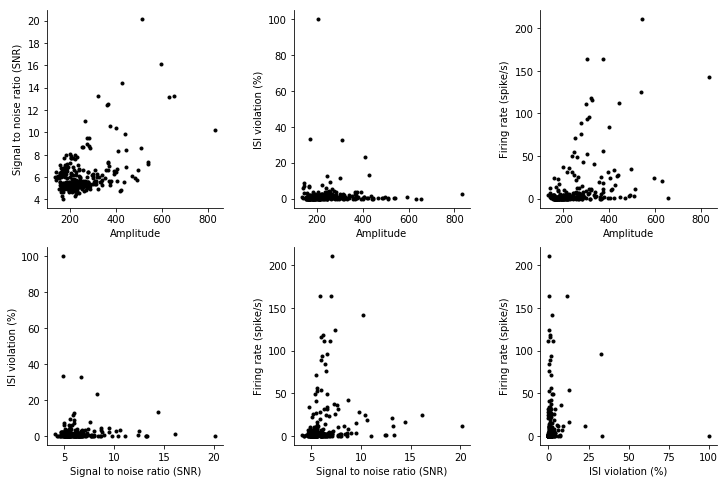

In [10]:
unit_characteristic_plot.plot_clustering_quality(probe_insertion)

#### Plot unit characteristic - overlay on probe

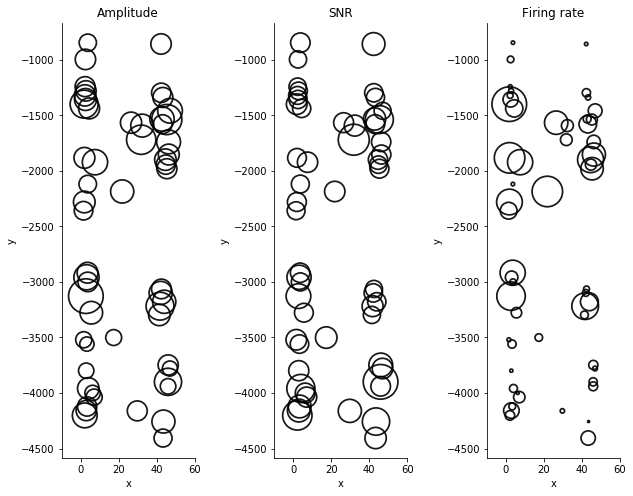

In [18]:
unit_characteristic_plot.plot_unit_characteristic(probe_insertion)

## Part 2: Other unit characteristic - as a function of position on probe

+ unit_characteristic_plot.plot_unit_selectivity(***probe insertion***)
+ unit_characteristic_plot.plot_unit_bilateral_photostim_effect(***probe insertion***)

#### Plot unit selectivity - overlay on probe

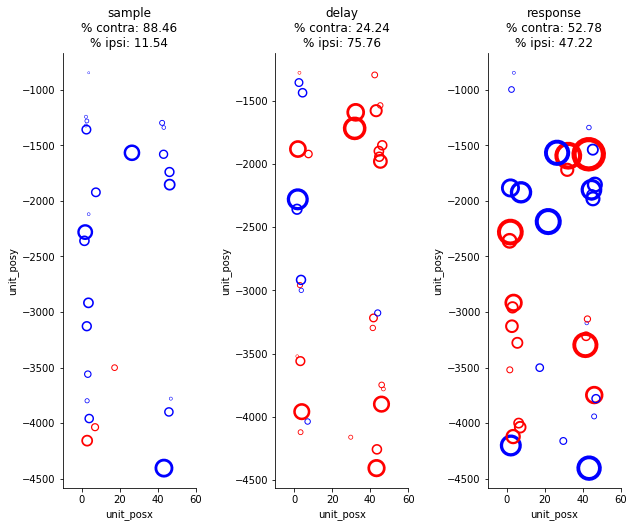

In [19]:
unit_characteristic_plot.plot_unit_selectivity(probe_insertion)

#### Plot effect of bilateral perturbation - overlay on probe

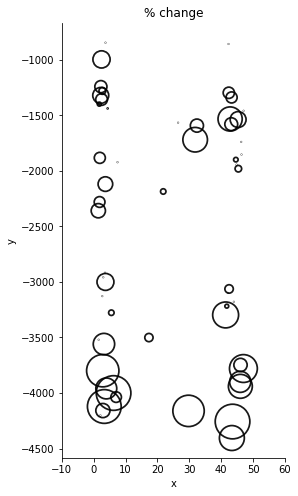

In [41]:
unit_characteristic_plot.plot_unit_bilateral_photostim_effect(probe_insertion)

## Part 3: Unit PSTH and Unit Selectivity

### The MAP pipeline provides 5 built-in functions for visualizing unit PSTH
+ unit_characteristic_plot.plot_stacked_contra_ipsi_psth(***units***)
+ unit_characteristic_plot.plot_avg_contra_ipsi_psth(***units***)
+ unit_characteristic_plot.plot_psth_bilateral_photostim_effect(***units***)
+ unit_characteristic_plot.plot_coding_direction(***units***) 
+ unit_characteristic_plot.plot_paired_coding_direction(***units***)

Note: These functions visualize the PSTH of a group of units in various ways, thus the input to these functions is a group of units, this can be specified as a queried expression of the ***ephys.Unit*** table (see examples below).

#### Let's pick the units from session 15 on animal 412330, where the probe was inserted in left ALM

In [33]:
units = ephys.Unit & {'subject_id': 432572, 'session': 15, 'insertion_number': 2} & 'unit_quality != "all"'

In [34]:
units

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name,electrode_group electrode group,electrode electrode,"unit_posx (um) estimated x position of the unit relative to probe's (0,0)","unit_posy (um) estimated y position of the unit relative to probe's (0,0)",spike_times (s) from the start of the first data point used in clustering,unit_amp,unit_snr,waveform average spike waveform
432572,15,2,jrclust,1,1,good,15131808323,npx_first384,0,2,43.32886505126953,14.836037635803223,=BLOB=,223.79529,7.620705,=BLOB=
432572,15,2,jrclust,10,10,good,15131808323,npx_first384,0,18,43.5385856628418,163.24386596679688,=BLOB=,367.57336,12.509553,=BLOB=
432572,15,2,jrclust,12,12,good,15131808323,npx_first384,0,23,2.0848867893218994,218.45968627929688,=BLOB=,426.35858,14.431208,=BLOB=
432572,15,2,jrclust,14,14,good,15131808323,npx_first384,0,28,29.74251365661621,259.17950439453125,=BLOB=,274.25394,8.989804,=BLOB=
432572,15,2,jrclust,16,16,good,15131808323,npx_first384,0,27,2.8807826042175293,262.1652526855469,=BLOB=,285.08435,8.747346,=BLOB=
432572,15,2,jrclust,17,17,good,15131808323,npx_first384,0,31,3.3211071491241455,298.7952575683594,=BLOB=,257.4117,8.714505,=BLOB=
432572,15,2,jrclust,23,23,good,15131808323,npx_first384,0,38,7.027822494506836,383.24835205078125,=BLOB=,179.28282,6.758669,=BLOB=
432572,15,2,jrclust,26,26,good,15131808323,npx_first384,0,46,3.9450523853302,461.1274108886719,=BLOB=,320.66016,13.232337,=BLOB=
432572,15,2,jrclust,27,27,good,15131808323,npx_first384,0,42,6.226199150085449,419.9575500488281,=BLOB=,165.60938,6.5694947,=BLOB=
432572,15,2,jrclust,28,28,good,15131808323,npx_first384,0,49,45.988990783691406,480.18218994140625,=BLOB=,167.36017,6.433754,=BLOB=


#### Let's exclude the units of type "all"

In [14]:
units = units & 'unit_quality != "all"'

In [15]:
units

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name,electrode_group electrode group,electrode electrode,"unit_posx (um) estimated x position of the unit relative to probe's (0,0)","unit_posy (um) estimated y position of the unit relative to probe's (0,0)",spike_times (s) from the start of the first data point used in clustering,unit_amp,unit_snr,waveform average spike waveform
412330,15,1,jrclust,7,7,good,15131808323,npx_first384,0,3,7.404426574707031,23.034358978271484,=BLOB=,427.98932,13.06085,=BLOB=
412330,15,1,jrclust,8,8,good,15131808323,npx_first384,0,3,3.042593002319336,19.83121109008789,=BLOB=,290.44583,7.659547,=BLOB=
412330,15,1,jrclust,12,12,good,15131808323,npx_first384,0,4,32.344425201416016,16.04660415649414,=BLOB=,225.7262,11.071866,=BLOB=
412330,15,1,jrclust,18,18,good,15131808323,npx_first384,0,11,6.8651227951049805,96.26170349121094,=BLOB=,296.88046,12.259954,=BLOB=
412330,15,1,jrclust,33,33,multi,15131808323,npx_first384,0,15,1.1657735109329224,140.07492065429688,=BLOB=,291.5367,11.471023,=BLOB=
412330,15,1,jrclust,34,34,good,15131808323,npx_first384,0,15,2.5680699348449707,142.50448608398438,=BLOB=,231.31876,8.671488,=BLOB=
412330,15,1,jrclust,35,35,good,15131808323,npx_first384,0,21,15.262028694152832,201.51885986328125,=BLOB=,241.5961,7.549255,=BLOB=
412330,15,1,jrclust,38,38,good,15131808323,npx_first384,0,18,46.01060485839844,161.53170776367188,=BLOB=,330.37268,11.911634,=BLOB=
412330,15,1,jrclust,49,49,multi,15131808323,npx_first384,0,23,3.594064474105835,220.0469970703125,=BLOB=,329.72577,10.56204,=BLOB=
412330,15,1,jrclust,53,53,good,15131808323,npx_first384,0,25,16.018810272216797,239.96383666992188,=BLOB=,229.43436,8.782874,=BLOB=


#### Plot unit PSTHs categorized by selectivity

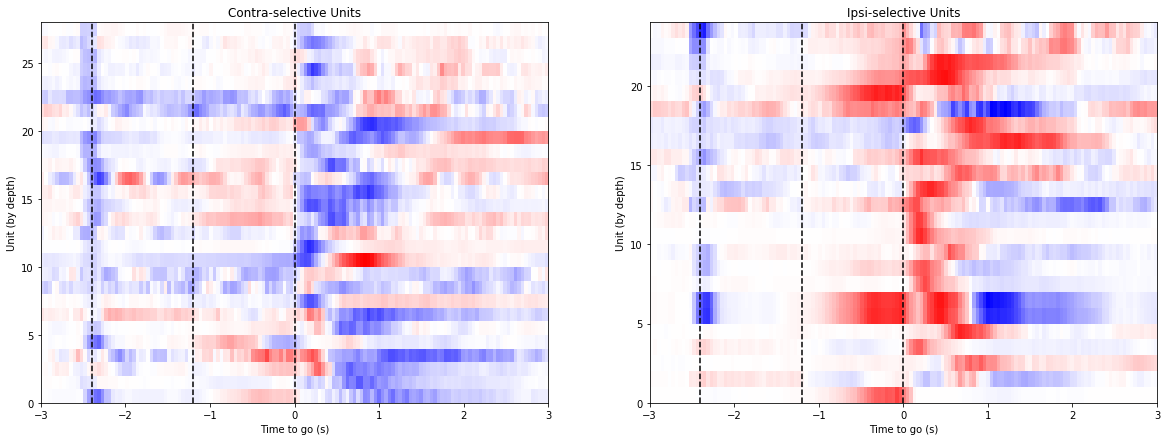

In [31]:
unit_characteristic_plot.plot_stacked_contra_ipsi_psth(units)

####  Plot average PSTH categorized by selectivy

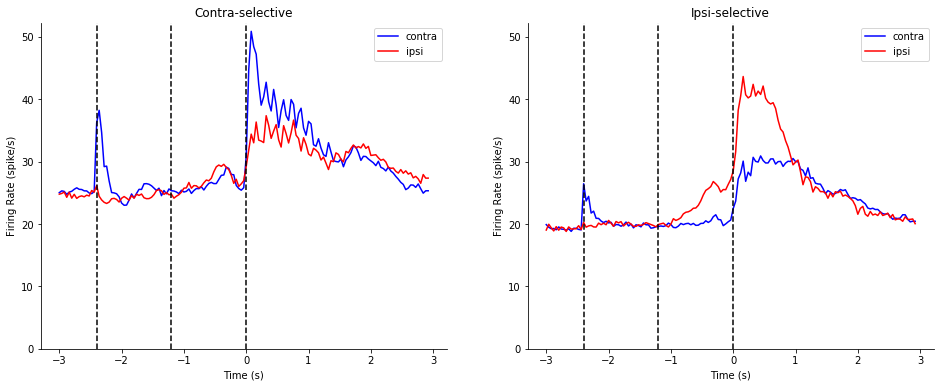

In [35]:
unit_characteristic_plot.plot_avg_contra_ipsi_psth(units)

#### For visualizing the effect of bilateral perturbation, let's compare the units from the ALM vs. Thalamus based on the probe insertion location - from all sessions of animal 412330

In [18]:
units = ephys.Unit * ephys.ProbeInsertion.InsertionLocation * experiment.BrainLocation & 'subject_id = 412753' 

In [19]:
units = units & 'unit_quality = "good"'

In [20]:
units

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,brain_location_name unique name of this brain location (could be hash of the non-primary attr),unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name,electrode_group electrode group,electrode electrode,"unit_posx (um) estimated x position of the unit relative to probe's (0,0)","unit_posy (um) estimated y position of the unit relative to probe's (0,0)",spike_times (s) from the start of the first data point used in clustering,unit_amp,unit_snr,waveform average spike waveform,ml_location um from ref ; right is positive; based on manipulator coordinates/reconstructed track,ap_location um from ref; anterior is positive; based on manipulator coordinates/reconstructed track,dv_location um from dura; ventral is positive; based on manipulator coordinates/reconstructed track,ml_angle Angle between the manipulator/reconstructed track and the Medio-Lateral axis. A tilt towards the right hemishpere is positive.,ap_angle Angle between the manipulator/reconstructed track and the Anterior-Posterior axis. An anterior tilt is positive.,brain_area,hemisphere,skull_reference
412753,41,1,jrclust,1,right_alm,1,good,15131808323,npx_first384,0,2,44.526458740234375,1.7173402309417725,=BLOB=,166.25258,9.730891,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma
412753,41,1,jrclust,2,right_alm,2,good,15131808323,npx_first384,0,2,37.63747787475586,4.586958885192871,=BLOB=,98.09725,6.4640074,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma
412753,41,1,jrclust,3,right_alm,3,good,15131808323,npx_first384,0,6,46.72496795654297,39.459388732910156,=BLOB=,116.633896,7.1068344,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma
412753,41,1,jrclust,4,right_alm,4,good,15131808323,npx_first384,0,6,44.589141845703125,35.944061279296875,=BLOB=,245.79802,15.696075,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma
412753,41,1,jrclust,5,right_alm,5,good,15131808323,npx_first384,0,7,5.701788902282715,57.029510498046875,=BLOB=,94.57545,6.8286357,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma
412753,41,1,jrclust,51,right_alm,51,good,15131808323,npx_first384,0,17,11.982519149780273,159.14566040039062,=BLOB=,119.50731,6.17433,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma
412753,41,1,jrclust,52,right_alm,52,good,15131808323,npx_first384,0,17,12.037041664123535,155.45492553710938,=BLOB=,121.01767,6.4501233,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma
412753,41,1,jrclust,53,right_alm,53,good,15131808323,npx_first384,0,18,34.832393646240234,158.12326049804688,=BLOB=,67.44633,6.452573,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma
412753,41,1,jrclust,54,right_alm,54,good,15131808323,npx_first384,0,19,10.52071762084961,176.73159790039062,=BLOB=,85.81075,6.7696877,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma
412753,41,1,jrclust,57,right_alm,57,good,15131808323,npx_first384,0,20,29.575611114501953,177.49545288085938,=BLOB=,90.201935,5.858861,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma


####  Plot average PSTH - effect of bilateral perturbation

In [37]:
psth.UnitSelectivity()

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_selectivity
412330,15,1,jrclust,7,contra-selective
412330,15,1,jrclust,8,contra-selective
412330,15,1,jrclust,12,contra-selective
412330,15,1,jrclust,18,contra-selective
412330,15,1,jrclust,33,contra-selective
412330,15,1,jrclust,38,contra-selective
412330,15,1,jrclust,49,contra-selective
412330,15,1,jrclust,53,contra-selective
412330,15,1,jrclust,82,contra-selective
412330,15,1,jrclust,86,contra-selective


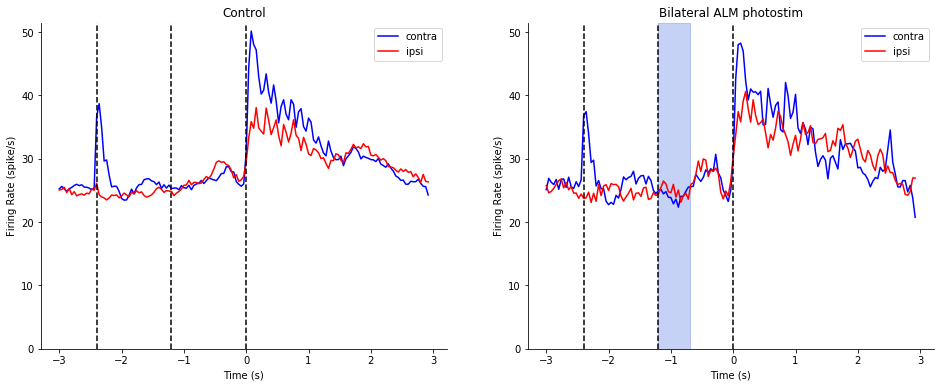

In [39]:
unit_characteristic_plot.plot_psth_bilateral_photostim_effect(units * psth.UnitSelectivity & 'unit_selectivity = "contra-selective"')

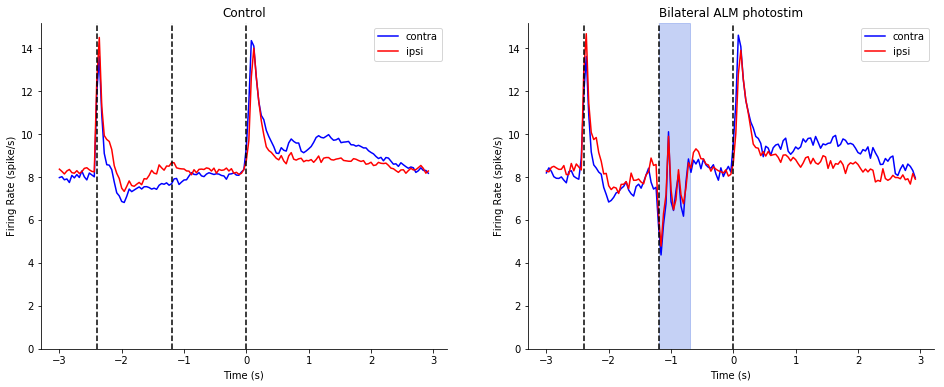

In [22]:
unit_characteristic_plot.plot_psth_bilateral_photostim_effect(units & 'brain_area = "thalamus"')

#### Plot trial psth projected on the coding direction vector
Note: CD vector is calculated for:
+ the specified **units**
+ the specified **time_period**

From the selected units above, let's exclude the `non-selective` ones and select those from `thalamus` only

In [29]:
units = units * psth.UnitSelectivity & 'unit_selectivity != "non-selective"'

In [30]:
units

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,brain_location_name unique name of this brain location (could be hash of the non-primary attr),unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name,electrode_group electrode group,electrode electrode,"unit_posx (um) estimated x position of the unit relative to probe's (0,0)","unit_posy (um) estimated y position of the unit relative to probe's (0,0)",spike_times (s) from the start of the first data point used in clustering,unit_amp,unit_snr,waveform average spike waveform,ml_location um from ref ; right is positive; based on manipulator coordinates/reconstructed track,ap_location um from ref; anterior is positive; based on manipulator coordinates/reconstructed track,dv_location um from dura; ventral is positive; based on manipulator coordinates/reconstructed track,ml_angle Angle between the manipulator/reconstructed track and the Medio-Lateral axis. A tilt towards the right hemishpere is positive.,ap_angle Angle between the manipulator/reconstructed track and the Anterior-Posterior axis. An anterior tilt is positive.,brain_area,hemisphere,skull_reference,unit_selectivity
412753,41,1,jrclust,1,right_alm,1,good,15131808323,npx_first384,0,2,44.526458740234375,1.7173402309417725,=BLOB=,166.25258,9.730891,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma,ipsi-selective
412753,41,1,jrclust,2,right_alm,2,good,15131808323,npx_first384,0,2,37.63747787475586,4.586958885192871,=BLOB=,98.09725,6.4640074,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma,ipsi-selective
412753,41,1,jrclust,3,right_alm,3,good,15131808323,npx_first384,0,6,46.72496795654297,39.459388732910156,=BLOB=,116.633896,7.1068344,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma,contra-selective
412753,41,1,jrclust,5,right_alm,5,good,15131808323,npx_first384,0,7,5.701788902282715,57.029510498046875,=BLOB=,94.57545,6.8286357,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma,ipsi-selective
412753,41,1,jrclust,51,right_alm,51,good,15131808323,npx_first384,0,17,11.982519149780273,159.14566040039062,=BLOB=,119.50731,6.17433,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma,contra-selective
412753,41,1,jrclust,52,right_alm,52,good,15131808323,npx_first384,0,17,12.037041664123535,155.45492553710938,=BLOB=,121.01767,6.4501233,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma,contra-selective
412753,41,1,jrclust,53,right_alm,53,good,15131808323,npx_first384,0,18,34.832393646240234,158.12326049804688,=BLOB=,67.44633,6.452573,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma,ipsi-selective
412753,41,1,jrclust,54,right_alm,54,good,15131808323,npx_first384,0,19,10.52071762084961,176.73159790039062,=BLOB=,85.81075,6.7696877,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma,contra-selective
412753,41,1,jrclust,57,right_alm,57,good,15131808323,npx_first384,0,20,29.575611114501953,177.49545288085938,=BLOB=,90.201935,5.858861,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma,contra-selective
412753,41,1,jrclust,64,right_alm,64,good,15131808323,npx_first384,0,22,45.07836151123047,198.99945068359375,=BLOB=,103.92063,6.753752,=BLOB=,1000.0,2500.0,2019.4,nan,nan,ALM,right,Bregma,ipsi-selective


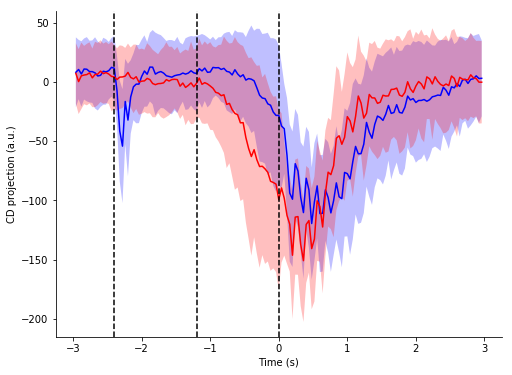

In [40]:
unit_characteristic_plot.plot_coding_direction(units, time_period=(-0.4, 0))

#### Plot trial-to-trial CD-endpoint correlation between two unit groups

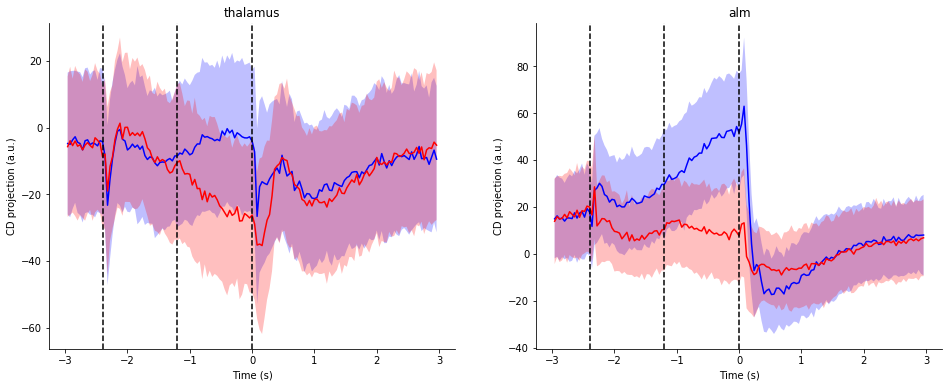

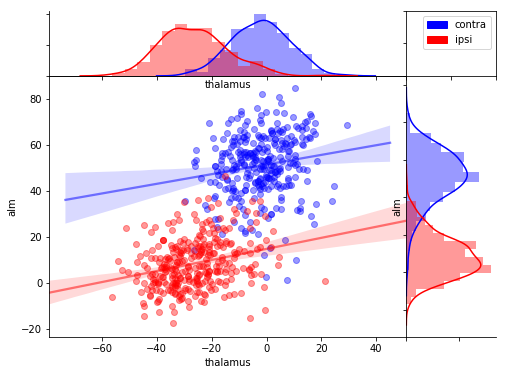

In [32]:
unit_characteristic_plot.plot_paired_coding_direction(units & 'brain_area = "thalamus"',
                                                      units & 'brain_area = "alm"',
                                                      labels=('thalamus', 'alm'), time_period=(-0.4, 0))

In [30]:
import importlib
importlib.reload(unit_characteristic_plot)

<module 'pipeline.plot.unit_characteristic_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\unit_characteristic_plot.py'>